In [1]:
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def Geometric_Slerp(P0,P1,r,cant_puntos):

    omega = math.acos((P0[0]*P1[0]+P0[1]*P1[1]+P0[2]*P1[2])/(r*r)) #La fórmula falla cuando los puntos son los extremos de un diametro

    x_geo = [P0[0]*np.sin(omega*(1-t))/np.sin(omega)+P1[0]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    y_geo = [P0[1]*np.sin(omega*(1-t))/np.sin(omega)+P1[1]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    z_geo = [P0[2]*np.sin(omega*(1-t))/np.sin(omega)+P1[2]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    return x_geo,y_geo,z_geo

In [3]:
def cross(a, b):
    c = [a[1]*b[2] - a[2]*b[1],
         a[2]*b[0] - a[0]*b[2],
         a[0]*b[1] - a[1]*b[0]]

    return c

In [4]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

In [5]:
from scipy.optimize import fsolve
import math

def equations(p):
    x, y, z = p

    return (In_rot[0]*x + In_rot[1]*y + In_rot[2]*z - np.cos(theta_cap),\
            normal_vector[0]*x + normal_vector[1]*y + normal_vector[2]*z,\
           x*x+y*y+z*z-1)

In [6]:

def color_triangle(x, y, z, V0, V1, V2):
    
    Centroid = [V0[0]+V1[0]+V2[0],V0[1]+V1[1]+V2[1],V0[2]+V1[2]+V2[2]]
   
    x_cons_0 = V0[1]*V1[2] - V0[2]*V1[1]
    y_cons_0 = V0[2]*V1[0] - V0[0]*V1[2]
    z_cons_0 = V0[0]*V1[1] - V0[1]*V1[0]
    
    if Centroid[0]*x_cons_0+Centroid[1]*y_cons_0+Centroid[2]*z_cons_0<0:
        x_cons_0 = -x_cons_0
        y_cons_0 = -y_cons_0
        z_cons_0 = -z_cons_0
    
    x_cons_1 = V2[1]*V1[2] - V2[2]*V1[1]
    y_cons_1 = V2[2]*V1[0] - V2[0]*V1[2]
    z_cons_1 = V2[0]*V1[1] - V2[1]*V1[0]
    
    if Centroid[0]*x_cons_1+Centroid[1]*y_cons_1+Centroid[2]*z_cons_1<0:
        x_cons_1 = -x_cons_1
        y_cons_1 = -y_cons_1
        z_cons_1 = -z_cons_1
    
    x_cons_2 = V0[1]*V2[2] - V0[2]*V2[1]
    y_cons_2 = V0[2]*V2[0] - V0[0]*V2[2]
    z_cons_2 = V0[0]*V2[1] - V0[1]*V2[0]
    
    if Centroid[0]*x_cons_2+Centroid[1]*y_cons_2+Centroid[2]*z_cons_2<0:
        x_cons_2 = -x_cons_2
        y_cons_2 = -y_cons_2
        z_cons_2 = -z_cons_2
    
    total = np.sign(x_cons_1*x + y_cons_1*y + z_cons_1*z) + np.sign(x_cons_2*x + y_cons_2*y + z_cons_2*z) + np.sign(x_cons_0*x + y_cons_0*y + z_cons_0*z)
   
    total[total < 3] = 0
    
    return total/3


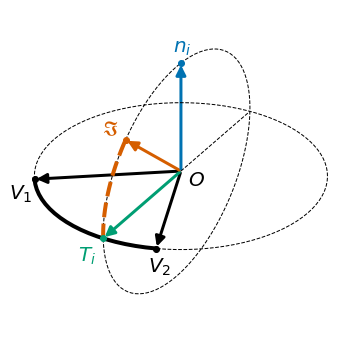

In [7]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Unit ball
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 200)

# Great circle 1

x_C1 = r * np.cos(u)
y_C1 = r * np.sin(u)
z_C1 = 0 * np.cos(u)

# Great circle 2

x_C2 = 0 * np.cos(u)
y_C2 = r * np.sin(u)
z_C2 = r * np.cos(u)

# Vertices
V0 = [-x_C1[10], -y_C1[10], -z_C1[10]]
V1 = [x_C1[80], y_C1[80], z_C1[80]]
T = [0, -r, 0]
Or = [0,0,0]
In = [0,-r*cos(np.pi/4),r*sin(np.pi/4)]
n = [0,0,1]
# Plot arrows 

aV0 = Arrow3D([Or[0], V0[0]], [Or[1], V0[1]], 
                [Or[2], V0[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="k")
ax.add_artist(aV0)

aV1 = Arrow3D([Or[0], V1[0]], [Or[1], V1[1]], 
                [Or[2], V1[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="k")
ax.add_artist(aV1)


aT = Arrow3D([Or[0], T[0]], [Or[1], T[1]], 
                [Or[2], T[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="#009E73")
ax.add_artist(aT)

aIn = Arrow3D([Or[0], In[0]], [Or[1], In[1]], 
                [Or[2], In[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="#D55E00")
ax.add_artist(aIn)
an = Arrow3D([Or[0], n[0]], [Or[1], n[1]], 
                [Or[2], n[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="#0072B2")
ax.add_artist(an)

ax.plot([0,-T[0]],[0,-T[1]],[0,-T[2]], "--" , linewidth=1, color='k')

# Great circles
ax.plot(x_C1, y_C1, z_C1, "--" , linewidth=1, color='k')
ax.plot(x_C2, y_C2, z_C2, "--" , linewidth=1,color='k')


# Border side
[Side_x, Side_y, Side_z] = Geometric_Slerp(V0, V1, r, 20)
ax.plot(Side_x, Side_y, Side_z, color='k',linewidth=4)

# Theta
[Theta_x, Theta_y, Theta_z] = Geometric_Slerp(T, In, r, 20)
ax.plot(Theta_x, Theta_y, Theta_z, "--", color='#D55E00',linewidth=4)

# Plot vertices & incenter
ax.plot([V0[0]],[V0[1]],[V0[2]], color="k", marker='o' )
ax.plot([V1[0]],[V1[1]],[V1[2]], color="k", marker='o' )
ax.plot([In[0]],[In[1]],[In[2]], color="#D55E00", marker='o' )
ax.plot([T[0]],[T[1]],[T[2]], color="#009E73", marker='o' )
ax.plot([n[0]],[n[1]],[n[2]], color="#0072B2", marker='o' )

# Annotations

ax.text(V1[0], V1[1]-.1, V1[2]-.15, r"$V_2$", color='k',fontsize = 20)
ax.text(V0[0], V0[1]-.3, V0[2], r"$V_1$", color='k',fontsize = 20)
ax.text(0, 0.1, -.2, r"$O$", color='k',fontsize = 20)
ax.text(0, -0.1, 1+0.15, r"$n_i$", color='#0072B2',fontsize = 20)

ax.text(In[0]-.07, In[1]-.17, In[2]+.12, r"$\mathfrak{I}$", color='#D55E00',fontsize = 20)
ax.text(T[0]-.1, T[1]-.15, T[2]-.15, r"$T_i$", color='#009E73',fontsize = 20)

#ax.view_init(elev=30, azim=45)
ax.dist=6.5
ax.set_axis_off()
plt.tight_layout()
fig.savefig('tangent_incenter_diagram.PNG', format='PNG', dpi=300)
plt.show()

In [8]:
phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

In [9]:
def spherical_area(a, b, c):
        t = abs( inner(a, cross(b, c) ) )
        t /= 1 + inner(a,b) + inner(b,c) + inner(a,c)
        return 2*arctan(t)

In [10]:
# Vertices
V0 = [0.99014754, 0.09901475, 0.09901475]
V1 = [0.09901475, 0.99014754, 0.09901475]
V2 = [0.09901475, 0.09901475, 0.99014754]


spherical_area(V0, V1, V2)

1.0560796407144937

In [11]:
V0_iso = [1, 0, 0]
V1_iso = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2_iso = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

spherical_area(V0_iso, V1_iso, V2_iso)

0.8000000000014511

In [12]:
from scipy.optimize import fsolve
import random

V0_aux = [1, 0, 0]
aux_b = -0.2
V1_aux = [aux_b, sqrt(1-aux_b*aux_b), 0]

target_area = spherical_area(V0_iso, V1_iso, V2_iso)

def third_vertex_same_area(p):
    
    c1, c2, c3 = p

    mod_V3_aux = sqrt(c1*c1+c2*c2+c3*c3)
    V3_aux = [c1/mod_V3_aux, c2/mod_V3_aux, c3/mod_V3_aux]
    
    output = (target_area - spherical_area(V0_aux, V1_aux, V3_aux))
    
    return mod_V3_aux-1, output, output
    

c1, c2, c3 = fsolve(third_vertex_same_area, [0,0,1])
print(c1, c2, c3, sqrt(c1*c1+c2*c2+c3*c3))
print(target_area - spherical_area(V0_aux, V1_aux, [c1, c2, c3]))

0.624241438623307 0.33879841108016295 0.703944786860394 0.9999999999964323
-1.3470224935474562e-11


In [13]:
from scipy.optimize import fsolve

def vertices_iso(p):
    b1, b2, b3, c1, c2, c3 = p
    
    T1 = 0.5*(b1+c1)
    T2 = 0.5*(b2+c2)
    T3 = 0.5*(b3+c3)
    
    mod_T = sqrt(T1*T1+T2*T2+T3*T3)
    T = [T1/mod_T, T2/mod_T, T3/mod_T]
    
    return 1-b1*b1-b2*b2-b3*b3, 1-c1*c1-c2*c2-c3*c3, (c1*V2[0] + c2*V2[1] + c3*V2[2]) - (b1*V2[0] + b2*V2[1] + b3*V2[2]), (c1*V2[0] + c2*V2[1] + c3*V2[2])-(b1*c1 + b2*c2 + b3*c3), area_iso - spherical_area([b1, b2, b3], [c1, c2, c3], V2), spherical_area(V2, T, [c1,c2,c3])-spherical_area(V2, [b1,b2,b3], T)

# Vertices
area_iso = 0.8
V2 = [1, 0, 0]

b1, b2, b3, c1, c2, c3 = fsolve(vertices_iso, [0,1,0, 0,0,1])

T1 = 0.5*(b1+c1)
T2 = 0.5*(b2+c2)
T3 = 0.5*(b3+c3)
    
mod_T = sqrt(T1*T1+T2*T2+T3*T3)
T = [T1/mod_T, T2/mod_T, T3/mod_T]

print(b1, b2, b3, c1, c2, c3)
print(vertices_iso([b1, b2, b3, c1, c2, c3]))
spherical_area([b1, b2, b3], [c1, c2, c3], V2)
print(spherical_area(V2, T, [c1,c2,c3]),spherical_area(V2, [b1,b2,b3], T))

0.3406884710289558 0.9328944522580684 0.11678744219579273 0.3406884710289558 0.12410827817548943 0.9319487652208257
(-5.647583095624853e-13, -3.539391002504999e-13, 0.0, 2.531308496145357e-14, -1.4510614931850796e-12, 1.9317880628477724e-14)
0.4000000000006752 0.4000000000006559


In [14]:
spherical_area(V2, T, [c1,c2,c3])-spherical_area(V2, [b1,b2,b3], T)

1.9317880628477724e-14

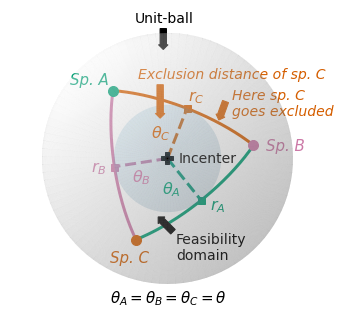

In [103]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Spherical cap
theta_cap = 0.4168419

r = 1

u_cap = np.linspace(0, 2 * np.pi, 100)
v_cap = np.linspace(0, theta_cap, 200)

x_cap = r * np.outer(np.cos(u_cap), np.sin(v_cap))
y_cap = r * np.outer(np.sin(u_cap), np.sin(v_cap))
z_cap = r * np.outer(np.ones(np.size(u_cap)), np.cos(v_cap))

# Unit ball
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 200)

x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Vertices
V0 = [1, 0, 0]
V1 = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2 = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

# Incenter
In = [0.7486381, 0.4706336, 0.4669529]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 20)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 20)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 20)


# Plot spherical cap and unit-ball
ax.plot_surface(x_cap, y_cap, z_cap, linewidth=0, rstride=1, cstride=1, color='#56B4E9', alpha = .2)
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)

# plot theta
normal_vector = cross(V2_rot, In_rot)

x, y, z =  fsolve(equations, (1, 0, 0))

# tangent point
T0 = [0.4161103, 0.64550138, 0.64045309]
T1 = [0.8187455, 0.07579173, 0.56913211]
T2 = [0.8187455, 0.56970963, 0.07132096]

T0_rot = np.dot(rotation_matrix(axis, theta), T0)
T1_rot = np.dot(rotation_matrix(axis, theta), T1)
T2_rot = np.dot(rotation_matrix(axis, theta), T2)

# Connections to tangent points
[In_T0_rot_x, In_T0_rot_y, In_T0_rot_z] = Geometric_Slerp(In_rot, T0_rot, r, 20)
[In_T1_rot_x, In_T1_rot_y, In_T1_rot_z] = Geometric_Slerp(In_rot, T1_rot, r, 20)
[In_T2_rot_x, In_T2_rot_y, In_T2_rot_z] = Geometric_Slerp(In_rot, T2_rot, r, 20)

# Plot arc distances to center
ax.plot(In_T0_rot_x, In_T0_rot_y, In_T0_rot_z, '--', color='#D55E00', linewidth = 3, alpha = 1)
ax.plot(In_T1_rot_x, In_T1_rot_y, In_T1_rot_z,'--', color='#CC79A7', linewidth = 3, alpha = 1)
ax.plot(In_T2_rot_x, In_T2_rot_y, In_T2_rot_z,'--', color='#009E73', linewidth = 3, alpha = 1)


# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)
#ax.plot(x_cap2.tolist(), y_cap2.tolist(), z_cap2.tolist(), '-.', color="k", linewidth = 2)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)
# ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], c="k", marker='s', markersize = 10)
ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="k", marker='P', markersize = 12 )

# Plot tangent points
ax.plot([T0_rot[0]],[T0_rot[1]],[T0_rot[2]], c="#D55E00", marker='s', markersize = 7)
ax.plot([T1_rot[0]],[T1_rot[1]],[T1_rot[2]], c="#CC79A7", marker='s', markersize = 7)
ax.plot([T2_rot[0]],[T2_rot[1]],[T2_rot[2]], c="#009E73", marker='s', markersize = 7)

ax.text2D(0.20, 0.75, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.33, 0.18, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.83, 0.54, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.495, 0.4, r"$\theta_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.46, 0.58, r"$\theta_C$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.4,0.44, r"$\theta_B$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.33,0.05, r"$\theta_A=\theta_B=\theta_C=\theta$",style='italic', size=15, transform=ax.transAxes)
ax.text2D(0.41,0.95, "Unit-ball", size=14, transform=ax.transAxes)
ax.text2D(0.54,0.19, "Feasibility\ndomain", size=14, transform=ax.transAxes)
ax.text2D(.55, .5, "Incenter", color='k',size = 14, transform=ax.transAxes)

#ax.text2D(0.16,0.11, r"$\theta_i\equiv$"+"Exclusion distance of sp. "+"$i$",style='italic', size=15, transform=ax.transAxes)

ax.text2D(
    0.5, .90, "             ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

ax.text2D(
    0.51,0.30, "             ", ha="center", va="center", rotation=135, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

ax.text2D(0.65, 0.35, r"$r_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.58, 0.7, r"$r_C$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.27,0.47, r"$r_B$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)

ax.text2D(0.42,0.77,"Exclusion distance of sp. C",style='italic', color="#D55E00", size=14, transform=ax.transAxes)
ax.text2D(0.72,0.65,"Here sp. C\ngoes excluded",style='italic', color="#D55E00", size=14, transform=ax.transAxes)

ax.text2D(
    0.49, .7, "                       ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
   0.69,0.67, "            ", ha="center", va="center", rotation=-110, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)


ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()
fig.savefig('iso_example_paper.PNG', format='PNG', dpi=300)
plt.show()

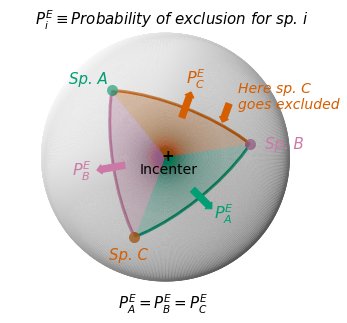

In [58]:

from matplotlib.colors import LightSource

light = LightSource(90, 45)

rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball


phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Vertices
V0 = [1, 0, 0]
V1 = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2 = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

# Incenter
In = [0.7486381, 0.4706336, 0.4669529]


# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Plot triangle
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.bwr(color_triangle(x, y, z, V0_rot, V1_rot, V2_rot)))
color_map_triangles = 0.25*color_triangle(x, y, z, V0_rot, V1_rot, In_rot)+0.5*color_triangle(x, y, z, V0_rot, In_rot, V2_rot)+.75*color_triangle(x, y, z, In_rot, V1_rot, V2_rot)
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors = cm.jet(color_map_triangles))

# Manual facecolors maps
color_map_triangles = color_map_triangles.astype(str)
color_map_triangles[color_map_triangles == "0.0"] = "white"
color_map_triangles[color_map_triangles == "0.25"] = "#009E73"
color_map_triangles[color_map_triangles == "0.5"] = "#CC79A7"
color_map_triangles[color_map_triangles == "0.75"] = "#D55E00"
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors = color_map_triangles, alpha=0.05)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 10)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 10)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 10)

# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)
#ax.plot(x_cap2.tolist(), y_cap2.tolist(), z_cap2.tolist(), '-.', color="k", linewidth = 2)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.text2D(0.20, 0.75, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.33, 0.18, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.837, 0.54, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.67, 0.31, r"$P_A^E$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.58, 0.75, r"$P_C^E$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.21,0.45, r"$P_B^E$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.36,0.02, r"$P_A^E=P_B^E=P_C^E$",style='italic', size=15, transform=ax.transAxes)


ax.text2D(
    0.63,0.38, "                  ", ha="center", va="center", rotation=-45, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)

ax.text2D(
    0.58, .68, "                  ", ha="center", va="center", rotation=70, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
    0.34,0.48, "                   ", ha="center", va="center", rotation=190, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CC79A7", ec="#CC79A7", lw=1),transform=ax.transAxes)

ax.text2D(.5,.5,"+", weight='bold', size=15, transform=ax.transAxes)
ax.text2D(.43, .46, "Incenter", color='k',size = 14, transform=ax.transAxes)

ax.text2D(0.09,0.94, r"$P_i^E\equiv$"+"Probability of exclusion for sp. "+"$i$",style='italic', size=15, transform=ax.transAxes)

ax.text2D(0.75,0.67,"Here sp. C\ngoes excluded",style='italic', color="#D55E00", size=14, transform=ax.transAxes)

ax.text2D(
   0.71,0.66, "            ", ha="center", va="center", rotation=-110, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()

fig.savefig('iso_decomp_paper.PNG', format='PNG', dpi=300)
plt.show()

In [17]:
from scipy.optimize import fsolve

def vertices(p):
    b1, b2, b3, c1, c2, c3 = p
    
    T1 = 0.5*(b1+c1)
    T2 = 0.5*(b2+c2)
    T3 = 0.5*(b3+c3)
    
    mod_T = sqrt(T1*T1+T2*T2+T3*T3)
    T = [T1/mod_T, T2/mod_T, T3/mod_T]
    
    return 1-b1*b1-b2*b2-b3*b3, 1-c1*c1-c2*c2-c3*c3, cos(dist_aT)-(T1*V0[0] - T2*V0[1] - T3*V0[2])/mod_T, spherical_area(V0, T, [c1,c2,c3])-0.5*spherical_area(V0, V1, V2), spherical_area(V0, [b1,b2,b3], T)-spherical_area(V0, T, [c1,c2,c3]), spherical_area(V0, V1, V2)-spherical_area(V0, [b1,b2,b3], T)-spherical_area(V0, T, [c1,c2,c3])

# Vertices
V0 = [1, 0, 0]
V1 = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2 = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

dist_aT = .22 * pi

b1, b2, b3, c1, c2, c3 = fsolve(vertices, [0,1,0, 0,0,1])

print(b1, b2, b3, c1, c2, c3)
print(vertices([b1, b2, b3, c1, c2, c3]))
print(spherical_area(V0, V1, V2), spherical_area([b1, b2, b3], [c1, c2, c3], V0))

0.3995691276168492 0.7476891904854146 -0.5303823023903146 0.39956912762129915 -0.19648768029759267 0.8953977349474517
(-2.07556194453673e-12, -5.802025526691068e-12, 3.527289571536585e-12, -5.199563002378227e-12, 1.1649570197391768e-12, 9.234168985017277e-12)
0.8000000000014511 0.7999999999941646


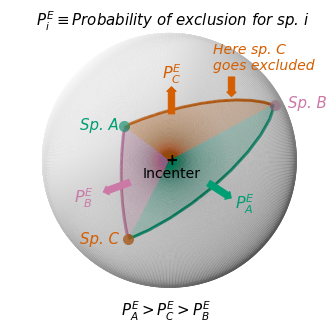

In [57]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Vertices
V0 = [1,0,0]
V1 = [-0.2000000, 0.9797959,0]
V2 = [0.624241438623307, 0.33879841108016295, 0.703944786860394]


# Incenter
In = [0.7417953, 0.5677937, 0.3568614]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Plot triangle
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.bwr(color_triangle(x, y, z, V0_rot, V1_rot, V2_rot)))
color_map_triangles = 0.25*color_triangle(x, y, z, V0_rot, V1_rot, In_rot)+0.5*color_triangle(x, y, z, V0_rot, In_rot, V2_rot)+.75*color_triangle(x, y, z, In_rot, V1_rot, V2_rot)
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors = cm.jet(color_map_triangles))

# Manual facecolors maps
color_map_triangles = color_map_triangles.astype(str)
color_map_triangles[color_map_triangles == "0.0"] = "white"
color_map_triangles[color_map_triangles == "0.25"] = "#009E73"
color_map_triangles[color_map_triangles == "0.5"] = "#CC79A7"
color_map_triangles[color_map_triangles == "0.75"] = "#D55E00"
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors = color_map_triangles, alpha=0.05)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 10)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 10)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 10)


# ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], c="k", marker='s', markersize = 10)

# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)


ax.text2D(0.23, 0.61, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.23, 0.25, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.89, 0.68, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.72, 0.36, r"$P_A^E$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.49, 0.77, r"$P_C^E$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.21,0.38, r"$P_B^E$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.36,0.02, r"$P_A^E>P_C^E>P_B^E$",style='italic', size=15, transform=ax.transAxes)


ax.text2D(
    0.67,0.42, "                  ", ha="center", va="center", rotation=-33, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)

ax.text2D(
    0.52, .7, "                  ", ha="center", va="center", rotation=90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
    0.35,0.43, "                   ", ha="center", va="center", rotation=200, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CC79A7", ec="#CC79A7", lw=1),transform=ax.transAxes)

ax.text2D(.5,.5,"+",weight='bold', size=15, transform=ax.transAxes)
ax.text2D(.43, .46, "Incenter", color='k',size = 14, transform=ax.transAxes)
ax.text2D(0.09,0.94, r"$P_i^E\equiv$"+"Probability of exclusion for sp. "+"$i$",style='italic', size=15, transform=ax.transAxes)

ax.text2D(0.65,0.8,"Here sp. C\ngoes excluded",style='italic', color="#D55E00", size=14, transform=ax.transAxes)

ax.text2D(
   0.71,0.75, "            ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()

fig.savefig('aniso_decomp_paper.PNG', format='PNG', dpi=300)
plt.show()

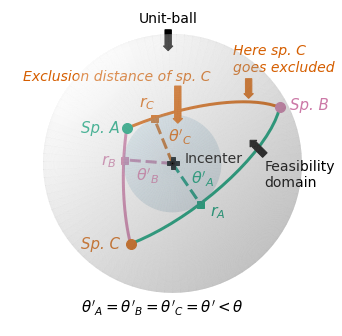

In [66]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Spherical cap
theta_cap = 0.3649059
theta_cap2 = 0.4168419
r = 1

u_cap = np.linspace(0, 2 * np.pi, 100)
v_cap = np.linspace(0, theta_cap, 200)
v_cap2 = np.linspace(0, theta_cap2, 200)

x_cap = r * np.outer(np.cos(u_cap), np.sin(v_cap))
y_cap = r * np.outer(np.sin(u_cap), np.sin(v_cap))
z_cap = r * np.outer(np.ones(np.size(u_cap)), np.cos(v_cap))

x_cap2 = theta_cap2 * np.cos(u_cap)
y_cap2 = theta_cap2 * np.sin(u_cap)
z_cap2 = 0*x_cap2

# Unit ball
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 200)

x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Vertices
V0 = [1,0,0]
V1 = [-0.2000000, 0.9797959,0]
V2 = [0.624241438623307, 0.33879841108016295, 0.703944786860394]


# Incenter
In = [0.7417953, 0.5677937, 0.3568614]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 20)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 20)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 20)


# Plot spherical cap and unit-ball
ax.plot_surface(x_cap, y_cap, z_cap, linewidth=0, rstride=1, cstride=1, color='#56B4E9', alpha = .2)
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)




# plot theta
# tangent point
T0 = [0.5374158, 0.5305311, 0.6555311]
T1 = [0.7874137, 0.2673264, 0.5554424]
T2 = [0.8051421, 0.5930820, 0.0000000]

T0_rot = np.dot(rotation_matrix(axis, theta), T0)
T1_rot = np.dot(rotation_matrix(axis, theta), T1)
T2_rot = np.dot(rotation_matrix(axis, theta), T2)

# Connections to tangent points
[In_T0_rot_x, In_T0_rot_y, In_T0_rot_z] = Geometric_Slerp(In_rot, T0_rot, r, 20)
[In_T1_rot_x, In_T1_rot_y, In_T1_rot_z] = Geometric_Slerp(In_rot, T1_rot, r, 20)
[In_T2_rot_x, In_T2_rot_y, In_T2_rot_z] = Geometric_Slerp(In_rot, T2_rot, r, 20)

# Plot arc distances to center
ax.plot(In_T0_rot_x, In_T0_rot_y, In_T0_rot_z, '--', color='#D55E00', linewidth = 3, alpha = 1)
ax.plot(In_T1_rot_x, In_T1_rot_y, In_T1_rot_z,'--', color='#CC79A7', linewidth = 3, alpha = 1)
ax.plot(In_T2_rot_x, In_T2_rot_y, In_T2_rot_z,'--', color='#009E73', linewidth = 3, alpha = 1)


# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)
#ax.plot(x_cap2.tolist(), y_cap2.tolist(), z_cap2.tolist(), '-.', color="k", linewidth = 2)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)
# ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], c="k", marker='s', markersize = 10)
ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="k", marker='P', markersize = 12 )

# Plot tangent points
ax.plot([T0_rot[0]],[T0_rot[1]],[T0_rot[2]], c="#D55E00", marker='s', markersize = 7)
ax.plot([T1_rot[0]],[T1_rot[1]],[T1_rot[2]], c="#CC79A7", marker='s', markersize = 7)
ax.plot([T2_rot[0]],[T2_rot[1]],[T2_rot[2]], c="#009E73", marker='s', markersize = 7)

ax.text2D(0.23, 0.61, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.23, 0.25, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.88, 0.68, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.57, 0.45, r"$\theta'_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.5, 0.58, r"$\theta'_C$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.4,0.46, r"$\theta'_B$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.23,0.05, r"$\theta'_A=\theta'_B=\theta'_C=\theta'<\theta$",style='italic', size=15, transform=ax.transAxes)
ax.text2D(0.41,0.95, "Unit-ball", size=14, transform=ax.transAxes)
ax.text2D(0.8,0.44, "Feasibility\ndomain", size=14, transform=ax.transAxes)
ax.text2D(.55, .515, "Incenter", color='k',size = 14, transform=ax.transAxes)

ax.text2D(
    0.5, .90, "             ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

ax.text2D(
    0.78,0.56, "             ", ha="center", va="center", rotation=135, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

ax.text2D(0.63, 0.35, r"$r_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.41, 0.69, r"$r_C$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.29,0.51, r"$r_B$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)

ax.text2D(0.05,0.77,"Exclusion distance of sp. C",style='italic', color="#D55E00", size=14, transform=ax.transAxes)

ax.text2D(
    0.53, .7, "                          ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(0.7,0.8,"Here sp. C\ngoes excluded",style='italic', color="#D55E00", size=14, transform=ax.transAxes)

ax.text2D(
   0.75,0.75, "            ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)


ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()
fig.savefig('aniso_example_paper.PNG', format='PNG', dpi=300)
#plt.savefig('aniso_example_paper.eps', format='eps')
plt.show()

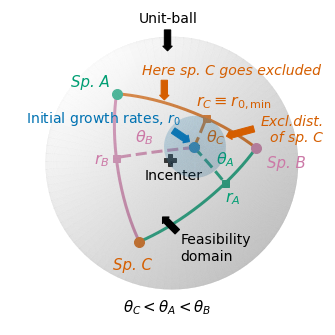

In [100]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Spherical cap
theta_cap = 0.254

r = 1

u_cap = np.linspace(0, 2 * np.pi, 100)
v_cap = np.linspace(0, theta_cap, 200)

x_cap = r * np.outer(np.cos(u_cap), np.sin(v_cap))
y_cap = r * np.outer(np.sin(u_cap), np.sin(v_cap))
z_cap = r * np.outer(np.ones(np.size(u_cap)), np.cos(v_cap))

# Unit ball
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 200)

x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Vertices
V0 = [1, 0, 0]
V1 = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2 = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

# tangent point
T0 = [0.4121494, 0.73630662, 0.53664274]
T1 = [0.7665143, 0.08477743, 0.63660716]
T2 = [0.6736607, 0.73331685, 0.09180267]

# Incenter
Real_In = [0.7486381, 0.4706336, 0.4669529]
In = [0.627744, 0.638259, 0.445604] #[0.416, 0.609, 0.675]

# Rotation
axis = cross(Real_In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

T0_rot = np.dot(rotation_matrix(axis, theta), T0)
T1_rot = np.dot(rotation_matrix(axis, theta), T1)
T2_rot = np.dot(rotation_matrix(axis, theta), T2)

Real_In_rot = np.dot(rotation_matrix(axis, theta), Real_In)
In_rot = np.dot(rotation_matrix(axis, theta), In)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 20)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 20)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 20)

# Connections to tangent points
[In_T0_rot_x, In_T0_rot_y, In_T0_rot_z] = Geometric_Slerp(In_rot, T0_rot, r, 20)
[In_T1_rot_x, In_T1_rot_y, In_T1_rot_z] = Geometric_Slerp(In_rot, T1_rot, r, 20)
[In_T2_rot_x, In_T2_rot_y, In_T2_rot_z] = Geometric_Slerp(In_rot, T2_rot, r, 20)

u_cap = np.linspace(0, 2 * np.pi, 100)
v_cap = np.linspace(0, theta_cap, 200)

adjust_cap = 0.9

x_cap = In_rot[0] + adjust_cap*r * np.outer(np.cos(u_cap), np.sin(v_cap))
y_cap = In_rot[1] + adjust_cap*r * np.outer(np.sin(u_cap), np.sin(v_cap))
z_cap = In_rot[2] + adjust_cap*r * np.outer(np.ones(np.size(u_cap)), np.cos(v_cap))

# Plot spherical cap and unit-ball
ax.plot_surface(x_cap, y_cap, z_cap, linewidth=0, rstride=1, cstride=1, color='#56B4E9', alpha = .3)
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)

# Plot arc distances to center
ax.plot(In_T0_rot_x, In_T0_rot_y, In_T0_rot_z, '--', color='#D55E00', linewidth = 3, alpha = 1)
ax.plot(In_T1_rot_x, In_T1_rot_y, In_T1_rot_z,'--', color='#CC79A7', linewidth = 3, alpha = 1)
ax.plot(In_T2_rot_x, In_T2_rot_y, In_T2_rot_z,'--', color='#009E73', linewidth = 3, alpha = 1)


# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)
#ax.plot(x_cap2.tolist(), y_cap2.tolist(), z_cap2.tolist(), '-.', color="k", linewidth = 2)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)
# ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], c="k", marker='s', markersize = 10)
ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="k", marker='*', markersize = 10 )

# Plot tangent points
ax.plot([T0_rot[0]],[T0_rot[1]],[T0_rot[2]], c="#D55E00", marker='s', markersize = 7)
ax.plot([T1_rot[0]],[T1_rot[1]],[T1_rot[2]], c="#CC79A7", marker='s', markersize = 7)
ax.plot([T2_rot[0]],[T2_rot[1]],[T2_rot[2]], c="#009E73", marker='s', markersize = 7)

ax.text2D(0.20, 0.75, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.33, 0.18, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.81, 0.50, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.65,0.51, r"$\theta_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.62,0.58, r"$\theta_C$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.40, 0.58, r"$\theta_B$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.36,0.05, r"$\theta_C<\theta_A<\theta_B$",style='italic', size=15, transform=ax.transAxes)
ax.text2D(0.41,0.95, "Unit-ball", size=14, transform=ax.transAxes)
ax.text2D(0.54,0.21, "Feasibility\ndomain", size=14, transform=ax.transAxes)
ax.text2D(.43, .46, "Incenter", color='k',size = 14, transform=ax.transAxes)


#ax.text2D(0.5, 0.74, "Isotropic\nfeasible domain", color="#56B4E9",size = 14, transform=ax.transAxes)

ax.text2D(
    0.5, .90, "             ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

ax.text2D(
    0.51,0.32, "             ", ha="center", va="center", rotation=135, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

ax.text2D(
    0.54,0.60, "            ", ha="center", va="center", rotation=-34, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#0072B2", ec="#0072B2", lw=1),transform=ax.transAxes)


#ax.text2D(
#    0.58,0.68, "                 ", ha="center", va="center", rotation=-90, size=4,
#    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#56B4E9", ec="#56B4E9", lw=1),transform=ax.transAxes)

# plot center and incenter
ax.plot([Real_In_rot[0]],[Real_In_rot[1]],[Real_In_rot[2]], color="k", marker= "P", markersize = 12)
ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="#0072B2", marker='o', markersize = 10 )

ax.text2D(0.68, 0.39, r"$r_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.59, 0.69, r"$r_C\equiv r_{0,\mathrm{min}}$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.27,0.51, r"$r_B$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)

ax.text2D(0.06, 0.64, "Initial growth rates, "+r"$r_0$", color='#0072B2',size = 14, transform=ax.transAxes)

ax.text2D(0.42,0.79,"Here sp. C goes excluded",style='italic', color="#D55E00", size=14, transform=ax.transAxes)
ax.text2D(0.79,0.58,"Excl.dist.\n  of sp. C",style='italic', color="#D55E00", size=14, transform=ax.transAxes)

ax.text2D(
    0.49, .745, "            ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
   0.73,0.61, "                   ", ha="center", va="center", rotation=-165, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()
fig.savefig('example_isotropic_perturbation.PNG', format='PNG', dpi=300)
#plt.savefig('aniso_example_paper.eps', format='eps')
plt.show()

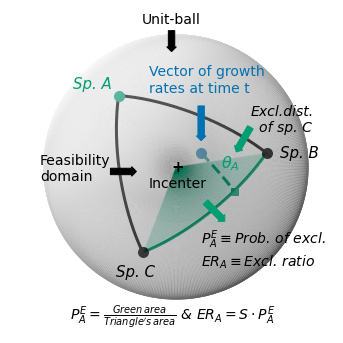

In [21]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Spherical cap
theta_cap = 0.254

r = 1 # unit-ball


phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Vertices
V0 = [1, 0, 0]
V1 = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2 = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

# Incenter
In = [0.7486381, 0.4706336, 0.4669529]


# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Plot triangle
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.bwr(color_triangle(x, y, z, V0_rot, V1_rot, V2_rot)))
color_map_triangles = 0.25*color_triangle(x, y, z, V0_rot, V1_rot, In_rot)+0.5*color_triangle(x, y, z, V0_rot, In_rot, V2_rot)+.75*color_triangle(x, y, z, In_rot, V1_rot, V2_rot)
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors = cm.jet(color_map_triangles))


# tangent point
T0 = [0.4121494, 0.73630662, 0.53664274]
T1 = [0.7665143, 0.08477743, 0.63660716]
T2 = [0.6736607, 0.73331685, 0.09180267]

# Incenter
Real_In = [0.7486381, 0.4706336, 0.4669529]
In = [0.627744, 0.638259, 0.445604] #[0.416, 0.609, 0.675]

# Rotation
axis = cross(Real_In, [0,0,1])
theta = np.arccos(Real_In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

T0_rot = np.dot(rotation_matrix(axis, theta), T0)
T1_rot = np.dot(rotation_matrix(axis, theta), T1)
T2_rot = np.dot(rotation_matrix(axis, theta), T2)

Real_In_rot = np.dot(rotation_matrix(axis, theta), Real_In)
In_rot = np.dot(rotation_matrix(axis, theta), In)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 20)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 20)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 20)

# Connections to tangent points
[In_T0_rot_x, In_T0_rot_y, In_T0_rot_z] = Geometric_Slerp(In_rot, T0_rot, r, 20)
[In_T1_rot_x, In_T1_rot_y, In_T1_rot_z] = Geometric_Slerp(In_rot, T1_rot, r, 20)
[In_T2_rot_x, In_T2_rot_y, In_T2_rot_z] = Geometric_Slerp(In_rot, T2_rot, r, 20)

# Manual facecolors maps
color_map_triangles = color_map_triangles.astype(str)
color_map_triangles[color_map_triangles == "0.0"] = "white"
color_map_triangles[color_map_triangles == "0.25"] = "#009E73"
color_map_triangles[color_map_triangles == "0.5"] = "white"
color_map_triangles[color_map_triangles == "0.75"] = "white"
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors = color_map_triangles, alpha=0.05)

# Plot arc distances to center
ax.plot(In_T2_rot_x, In_T2_rot_y, In_T2_rot_z,'--', color='#009E73', linewidth = 3, alpha = 1)


# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="k", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="k", linewidth = 3, alpha = 1)
#ax.plot(x_cap2.tolist(), y_cap2.tolist(), z_cap2.tolist(), '-.', color="k", linewidth = 2)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="k", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="k", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

# Plot tangent points
ax.plot([T2_rot[0]],[T2_rot[1]],[T2_rot[2]], c="#009E73", marker='s', markersize = 7)

ax.text2D(0.20, 0.75, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.33, 0.18, "Sp. C",style='italic', color="k", size=15, transform=ax.transAxes)
ax.text2D(0.83, 0.54, "Sp. B",style='italic', color="k", size=15, transform=ax.transAxes)

ax.text2D(0.65,0.51, r"$\theta_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.41,0.95, "Unit-ball", size=14, transform=ax.transAxes)

#ax.text2D(0.5, 0.74, "Isotropic\nfeasible domain", color="#56B4E9",size = 14, transform=ax.transAxes)

ax.text2D(
    0.5, .90, "             ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

# plot center and incenter
ax.plot([Real_In_rot[0]],[Real_In_rot[1]],[Real_In_rot[2]], color="k", marker= "P", markersize = 12)
ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="#0072B2", marker='o', markersize = 10 )

#ax.text2D(0.72, 0.38, r"$r_A$",style='italic', color="#009E73", size=16, transform=ax.transAxes)

ax.text2D(0.43, 0.74, "Vector of growth\nrates at time t", color='#0072B2',size = 14, transform=ax.transAxes)

ax.text2D(
    0.63,0.38, "                  ", ha="center", va="center", rotation=-45, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)


ax.text2D(.5,.5,"+", weight='bold', size=15, transform=ax.transAxes)

ax.text2D(.43, .45, "Incenter", color='k',size = 14, transform=ax.transAxes)

ax.text2D(
    0.59,0.65, "                        ", ha="center", va="center", rotation=-90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#0072B2", ec="#0072B2", lw=1),transform=ax.transAxes)

ax.text2D(
    0.35,0.5, "                 ", ha="center", va="center", rotation=0, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="k", ec="k", lw=1),transform=ax.transAxes)

ax.text2D(0.1,0.47, "Feasibility\ndomain", size=14, transform=ax.transAxes)

ax.text2D(0.59, 0.21, r"$P_A^E\equiv$"+"Prob. of excl.\n"+r"$ER_A\equiv$"+"Excl. ratio",style='italic', color="k", size=14, transform=ax.transAxes)

ax.text2D(0.19,0.05, r"$P_A^E=\frac{Green\,area}{Triangle's\,area}$"+" & "+r"$ER_A=S \cdot P_A^E$",style='italic', size=14, transform=ax.transAxes)

ax.text2D(0.74,0.62,"Excl.dist.\n  of sp. C",style='italic', color="k", size=14, transform=ax.transAxes)


ax.text2D(
   0.72,0.6, "                   ", ha="center", va="center", rotation=-120, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()
fig.savefig('summary_metrics.PNG', format='PNG', dpi=300)
#plt.savefig('aniso_example_paper.eps', format='eps')
plt.show()

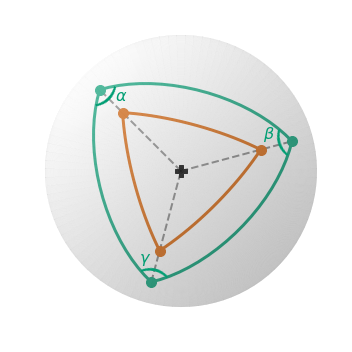

In [76]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Spherical cap
theta_cap = 0.05223717

r = 1

u_cap = np.linspace(0, 2 * np.pi, 100)
v_cap = np.linspace(0, theta_cap, 200)

x_cap = r * np.outer(np.cos(u_cap), np.sin(v_cap))
y_cap = r * np.outer(np.sin(u_cap), np.sin(v_cap))
z_cap = r * np.outer(np.ones(np.size(u_cap)), np.cos(v_cap))

# Unit ball
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 200)

x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Vertices
V0 = [1,0,0]
V1 = [0,1,0]
V2 = [0,0,1]


# Incenter
In = [0.5773503, 0.5773503, 0.5773503]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

M0_rot = np.dot(rotation_matrix(axis, theta), [1/sqrt(2),1/sqrt(2),0])
M1_rot = np.dot(rotation_matrix(axis, theta), [1/sqrt(2),0,1/sqrt(2)])
M2_rot = np.dot(rotation_matrix(axis, theta), [0,1/sqrt(2),1/sqrt(2)])

M0_rot = np.dot(rotation_matrix(V2, -pi/3), M0_rot)
M1_rot = np.dot(rotation_matrix(V2, -pi/3), M1_rot)
M2_rot = np.dot(rotation_matrix(V2, -pi/3), M2_rot)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 20)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 20)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 20)

[FD2_lim2_x, FD2_lim2_y, FD2_lim2_z] = Geometric_Slerp(M0_rot, M1_rot, r, 20)
[FD2_lim1_x, FD2_lim1_y, FD2_lim1_z] = Geometric_Slerp(M0_rot, M2_rot, r, 20)
[FD2_lim0_x, FD2_lim0_y, FD2_lim0_z] = Geometric_Slerp(M2_rot, M1_rot, r, 20)


[FD3_lim2_x, FD3_lim2_y, FD3_lim2_z] = Geometric_Slerp(V0_rot, In_rot, r, 20)
[FD3_lim1_x, FD3_lim1_y, FD3_lim1_z] = Geometric_Slerp(In_rot, V2_rot, r, 20)
[FD3_lim0_x, FD3_lim0_y, FD3_lim0_z] = Geometric_Slerp(In_rot, V1_rot, r, 20)

# Plot spherical cap and unit-ball
#ax.plot_surface(x_cap, y_cap, z_cap, linewidth=0, rstride=1, cstride=1, color='b', alpha = .5)
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)


# plot theta
normal_vector = cross(In_rot,V1_rot)

x, y, z =  fsolve(equations, (1, 0, 0))

[theta_x, theta_y, theta_z] = Geometric_Slerp(In_rot, [x,y,z], r, 10)
#ax.plot(theta_x, theta_y, theta_z,'--', color='r')


# Plot FD limits

ax.plot(FD3_lim2_x, FD3_lim2_y, FD3_lim2_z, '--', color='grey', linewidth = 2, alpha = 1)
ax.plot(FD3_lim1_x, FD3_lim1_y, FD3_lim1_z, '--', color='grey', linewidth = 2, alpha = 1)
ax.plot(FD3_lim0_x, FD3_lim0_y, FD3_lim0_z, '--', color='grey', linewidth = 2, alpha = 1)

ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color='#009E73', linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color='#009E73', linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color='#009E73', linewidth = 3, alpha = 1)

ax.plot(FD2_lim2_x, FD2_lim2_y, FD2_lim2_z, color='#D55E00', linewidth = 3, alpha = 1)
ax.plot(FD2_lim1_x, FD2_lim1_y, FD2_lim1_z, color='#D55E00', linewidth = 3, alpha = 1)
ax.plot(FD2_lim0_x, FD2_lim0_y, FD2_lim0_z, color='#D55E00', linewidth = 3, alpha = 1)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#009E73", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#009E73", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.plot([M0_rot[0]],[M0_rot[1]],[M0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([M1_rot[0]],[M1_rot[1]],[M1_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([M2_rot[0]],[M2_rot[1]],[M2_rot[2]], c="#D55E00", marker='o', markersize = 10)

ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="k", marker='P', markersize = 12 )


ax.text2D(0.32,0.724, r"$\alpha$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.755,0.61, r"$\beta$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.39, 0.245, r"$\gamma$",style='italic', color="#009E73", size=16, transform=ax.transAxes)

ax.text2D(0.245,0.704, ")",color="#009E73", size=30, rotation=-46, transform=ax.transAxes)
ax.text2D(0.78,0.57, "(",color="#009E73", size=30, rotation=18, transform=ax.transAxes)
ax.text2D(0.39, 0.215, ")", color="#009E73", size=30, rotation=76, transform=ax.transAxes)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()
fig.savefig('example_proportional_sph_triangles.PNG', format='PNG', dpi=300)
#plt.savefig('aniso_example_paper.eps', format='eps')
plt.show()

In [20]:
print(V0_rot)
print(V1_rot)
print(V2_rot)
print(M0_rot)
print(M1_rot)
print(M2_rot)

[ 0.78867515 -0.21132485  0.57735025]
[-0.21132485  0.78867515  0.57735025]
[-0.57735025 -0.57735025  0.5773503 ]
[ 0.55767757 -0.14942925  0.81649656]
[-0.40824826 -0.4082483   0.81649659]
[-0.14942922  0.55767753  0.81649659]


In [24]:
from scipy.optimize import fsolve

def prop_sides(p):
    a1, a2, b1, b2, b3, c1, c3 = p
    
    a3 = a2
    c2 = c1*In[1]/In[0]
    
    # print(a1, a2, a3, b1, b2, b3, c1, c2, c3)

    
    cos_M0M1 = a1*b1+a2*b2+a3*b3
    cos_M0M2 = a1*c1+a2*c2+a3*c3
    cos_M1M2 = c1*b1+c2*b2+c3*b3
    
    
    cos_M0In = a1*In[0]+a2*In[1]+a3*In[2]
    cos_M1In = b1*In[0]+b2*In[1]+b3*In[2]
    cos_M2In = c1*In[0]+c2*In[1]+c3*In[2]
    
    return 1-a1*a1-a2*a2-a3*a3, 1-b1*b1-b2*b2-b3*b3, 1-c1*c1-c2*c2-c3*c3, cos_prop_L_V0V1-cos_M0M1, cos_prop_L_V0V2-cos_M0M2,cos_prop_L_V1V2-cos_M1M2, cos_prop_L_V0In-cos_M0In

V0 = [1,0,0]
V1 = [1/sqrt(2),1/sqrt(2),0]
V2 = [0,0,1]

L_V0V1 = math.acos(V0[0]*V1[0]+V0[1]*V1[1]+V0[2]*V1[2])
L_V0V2 = math.acos(V0[0]*V2[0]+V0[1]*V2[1]+V0[2]*V2[2])
L_V1V2 = math.acos(V2[0]*V1[0]+V2[1]*V1[1]+V2[2]*V1[2])

# Incenter
In = [0.8628562, 0.3574067, 0.3574067]
prop = 0.6

cos_prop_L_V0V1 = cos(prop*L_V0V1)
cos_prop_L_V0V2 = cos(prop*L_V0V2)
cos_prop_L_V1V2 = cos(prop*L_V1V2)

L_V0In = math.acos(V0[0]*In[0]+V0[1]*In[1]+V0[2]*In[2])
L_V1In = math.acos(V1[0]*In[0]+V1[1]*In[1]+V1[2]*In[2])
L_V2In = math.acos(V2[0]*In[0]+V2[1]*In[1]+V2[2]*In[2])



cos_prop_L_V0In = cos(prop*L_V0In)
cos_prop_L_V1In = cos(prop*L_V1In)
cos_prop_L_V2In = cos(prop*L_V2In)


print(cos_prop_L_V0V1,cos_prop_L_V0V2,cos_prop_L_V1V2)
print(cos_prop_L_V0In,cos_prop_L_V1In,cos_prop_L_V2In)
print("-----------------------")

a1, a2, b1, b2, b3, c1, c3 = fsolve(prop_sides, [1,0,1/sqrt(3),1/sqrt(3),1/sqrt(3),1/sqrt(6),2/sqrt(6)])
a3 = a2
c2 = c1*In[1]/In[0]
print(a1, a2, a3, b1, b2, b3, c1, c2, c3)
print(prop_sides([a1, a2, b1, b2, b3, c1, c3]))
print(spherical_area(V0, V1, V2), spherical_area([b1, b2, b3], [c1, c2, c3], [a1, a2, a3]))

0.8910065241883679 0.5877852522924731 0.5877852522924731
0.949880883876946 0.9498808732713284 0.7497024602519698
-----------------------
0.9776202076232937 0.1487594195686591 0.1487594195686591 0.8005372044576908 0.5807636988654586 0.1478300028923951 0.4397005908238513 0.1821299275063481 0.8794839850427625
(-1.7422065179406587e-10, 6.040106748095297e-10, -1.100974866830029e-11, -1.860989140567426e-11, -3.764422107366272e-11, 9.058087613311727e-11, 1.1102230246251565e-16)
0.7853981633974483 0.23478470859241837


In [ ]:
print(0.7853981633974483/0.23478470859241837)

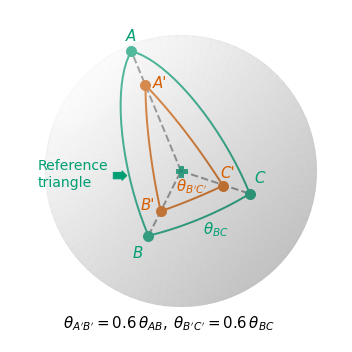

In [20]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Spherical cap
theta_cap = 0.05223717

r = 1

u_cap = np.linspace(0, 2 * np.pi, 100)
v_cap = np.linspace(0, theta_cap, 200)

x_cap = r * np.outer(np.cos(u_cap), np.sin(v_cap))
y_cap = r * np.outer(np.sin(u_cap), np.sin(v_cap))
z_cap = r * np.outer(np.ones(np.size(u_cap)), np.cos(v_cap))

# Unit ball
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 200)

x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Vertices
V0 = [1,0,0]
V1 = [1/sqrt(2),1/sqrt(2),0]
V2 = [0,0,1]

M0 = [0.9776202076232937, 0.1487594195686591, 0.1487594195686591]
M1 = [0.8005372044576908, 0.5807636988654586, 0.1478300028923951]
M2 = [0.4397005908238513, 0.1821299275063481, 0.8794839850427625]

# Incenter
In = [0.8628562, 0.3574067, 0.3574067]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

M0_rot = np.dot(rotation_matrix(axis, theta), M0)
M1_rot = np.dot(rotation_matrix(axis, theta), M1)
M2_rot = np.dot(rotation_matrix(axis, theta), M2)


In_rot = np.dot(rotation_matrix(axis, theta), In)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 20)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 20)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 20)

[FD2_lim2_x, FD2_lim2_y, FD2_lim2_z] = Geometric_Slerp(M0_rot, M1_rot, r, 20)
[FD2_lim1_x, FD2_lim1_y, FD2_lim1_z] = Geometric_Slerp(M0_rot, M2_rot, r, 20)
[FD2_lim0_x, FD2_lim0_y, FD2_lim0_z] = Geometric_Slerp(M2_rot, M1_rot, r, 20)


[FD3_lim2_x, FD3_lim2_y, FD3_lim2_z] = Geometric_Slerp(V0_rot, In_rot, r, 20)
[FD3_lim1_x, FD3_lim1_y, FD3_lim1_z] = Geometric_Slerp(In_rot, V2_rot, r, 20)
[FD3_lim0_x, FD3_lim0_y, FD3_lim0_z] = Geometric_Slerp(In_rot, V1_rot, r, 20)

# Plot spherical cap and unit-ball
#ax.plot_surface(x_cap, y_cap, z_cap, linewidth=0, rstride=1, cstride=1, color='b', alpha = .5)
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)


# plot theta
normal_vector = cross(In_rot,V1_rot)

x, y, z =  fsolve(equations, (1, 0, 0))

[theta_x, theta_y, theta_z] = Geometric_Slerp(In_rot, [x,y,z], r, 10)
#ax.plot(theta_x, theta_y, theta_z,'--', color='r')


# Plot FD limits

ax.plot(FD3_lim2_x, FD3_lim2_y, FD3_lim2_z, '--', color='grey', linewidth = 2, alpha = 1)
ax.plot(FD3_lim1_x, FD3_lim1_y, FD3_lim1_z, '--', color='grey', linewidth = 2, alpha = 1)
ax.plot(FD3_lim0_x, FD3_lim0_y, FD3_lim0_z, '--', color='grey', linewidth = 2, alpha = 1)

ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color='#009E73', linewidth = 2, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color='#009E73', linewidth = 2, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color='#009E73', linewidth = 2, alpha = 1)

ax.plot(FD2_lim2_x, FD2_lim2_y, FD2_lim2_z, color='#D55E00', linewidth = 2, alpha = 1)
ax.plot(FD2_lim1_x, FD2_lim1_y, FD2_lim1_z, color='#D55E00', linewidth = 2, alpha = 1)
ax.plot(FD2_lim0_x, FD2_lim0_y, FD2_lim0_z, color='#D55E00', linewidth = 2, alpha = 1)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#009E73", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#009E73", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.plot([M0_rot[0]],[M0_rot[1]],[M0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([M1_rot[0]],[M1_rot[1]],[M1_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([M2_rot[0]],[M2_rot[1]],[M2_rot[2]], c="#D55E00", marker='o', markersize = 10)

ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="#009E73", marker='P', markersize = 11 )



ax.text2D(0.35, 0.9, "A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.37, 0.26, "B",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.73, 0.48, "C",style='italic', color="#009E73", size=15, transform=ax.transAxes)

ax.text2D(0.43, 0.76, "A'",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.395, 0.4, "B'",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.63, 0.495, "C'",style='italic', color="#D55E00", size=15, transform=ax.transAxes)

ax.text2D(0.58,0.33, r"$\theta_{BC}$",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.5,0.455, r"$\theta_{B'C'}$",style='italic', color="#D55E00", size=15, transform=ax.transAxes)

ax.text2D(0.165,0.05, r"$\theta_{A'B'}=0.6\,\theta_{AB},\;\theta_{B'C'}=0.6\,\theta_{BC}$",style='italic', size=15, transform=ax.transAxes)

#ax.text2D(.43, .55, "Incenter", color='#009E73',size = 14, transform=ax.transAxes)

ax.text2D(0.09, 0.47, "Reference\ntriangle", color='#009E73',size = 14, transform=ax.transAxes)

ax.text2D(
    0.33, .50, "       ", ha="center", va="center", rotation=0, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)



ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()
fig.savefig('example_similar_sph_triangles.PNG', format='PNG', dpi=300)
#plt.savefig('aniso_example_paper.eps', format='eps')
plt.show()

In [ ]:
print(V0_rot)
print(V1_rot)
print(V2_rot)
print(M0_rot)
print(M1_rot)
print(M2_rot)

In [ ]:
print(math.acos(V0[0]*V1[0]+V0[1]*V1[1]+V0[2]*V1[2]))
print(math.acos(V0[0]*V2[0]+V0[1]*V2[1]+V0[2]*V2[2]))
print(math.acos(V2[0]*V1[0]+V2[1]*V1[1]+V2[2]*V1[2]))


M0 = [(1+1/sqrt(2))/sqrt(2+sqrt(2)),(1/sqrt(2))/sqrt(2+sqrt(2)),0]
M1 = [1/sqrt(2),0,1/sqrt(2)]
M2 = [1/2,1/2,1/sqrt(2)]

print(math.acos(M0[0]*M1[0]+M0[1]*M1[1]+M0[2]*M1[2]))
print(math.acos(M0[0]*M2[0]+M0[1]*M2[1]+M0[2]*M2[2]))
print(math.acos(M2[0]*M1[0]+M2[1]*M1[1]+M2[2]*M1[2]))

print(math.acos(V0[0]*V2[0]+V0[1]*V2[1]+V0[2]*V2[2])/math.acos(M0[0]*M1[0]+M0[1]*M1[1]+M0[2]*M1[2]))
print(math.acos(V0[0]*V1[0]+V0[1]*V1[1]+V0[2]*V1[2])/math.acos(M2[0]*M1[0]+M2[1]*M1[1]+M2[2]*M1[2]))

In [22]:
from scipy.optimize import fsolve

def prop_sides(p):
    a1, a2, b1, b2, b3, c1, c3 = p
    
    a3 = a2
    c2 = c1*In[1]/In[0]
    
    # print(a1, a2, a3, b1, b2, b3, c1, c2, c3)

    
    cos_M0M1 = a1*b1+a2*b2+a3*b3
    cos_M0M2 = a1*c1+a2*c2+a3*c3
    cos_M1M2 = c1*b1+c2*b2+c3*b3
    
    
    cos_M0In = a1*In[0]+a2*In[1]+a3*In[2]
    cos_M1In = b1*In[0]+b2*In[1]+b3*In[2]
    cos_M2In = c1*In[0]+c2*In[1]+c3*In[2]
    
    return 1-a1*a1-a2*a2-a3*a3, 1-b1*b1-b2*b2-b3*b3, 1-c1*c1-c2*c2-c3*c3, cos_prop_L_V0V1-cos_M0M1, cos_prop_L_V0V2-cos_M0M2,cos_prop_L_V1V2-cos_M1M2, cos_prop_L_V0In-cos_M0In

V0 = [1,0,0]
V1 = [1/sqrt(2),1/sqrt(2),0]
V2 = [0,0,1]

L_V0V1 = math.acos(V0[0]*V1[0]+V0[1]*V1[1]+V0[2]*V1[2])
L_V0V2 = math.acos(V0[0]*V2[0]+V0[1]*V2[1]+V0[2]*V2[2])
L_V1V2 = math.acos(V2[0]*V1[0]+V2[1]*V1[1]+V2[2]*V1[2])

L_V0In = math.acos(V0[0]*In[0]+V0[1]*In[1]+V0[2]*In[2])
L_V1In = math.acos(V1[0]*In[0]+V1[1]*In[1]+V1[2]*In[2])
L_V2In = math.acos(V2[0]*In[0]+V2[1]*In[1]+V2[2]*In[2])

# Incenter
In = [0.8628562, 0.3574067, 0.3574067]

a1 = []
a2 = []
a3 = []
b1 = []
b2 = []
b3 = []
c1 = []
c2 = []
c3 = []

for prop in np.linspace(0.2,1.1,21):
    
    cos_prop_L_V0V1 = cos(prop*L_V0V1)
    cos_prop_L_V0V2 = cos(prop*L_V0V2)
    cos_prop_L_V1V2 = cos(prop*L_V1V2)
    
    cos_prop_L_V0In = cos(prop*L_V0In)
    cos_prop_L_V1In = cos(prop*L_V1In)
    cos_prop_L_V2In = cos(prop*L_V2In)
    
    a1_aux, a2_aux, b1_aux, b2_aux, b3_aux, c1_aux, c3_aux = fsolve(prop_sides, [1,0,1/sqrt(3),1/sqrt(3),1/sqrt(3),1/sqrt(6),2/sqrt(6)])
    a3_aux = a2_aux
    c2_aux = c1_aux*In[1]/In[0]
    print(a1_aux, a2_aux, a3_aux, b1_aux, b2_aux, b3_aux, c1_aux, c2_aux, c3_aux)
    
    a1.append(a1_aux)
    a2.append(a2_aux)
    a3.append(a3_aux)
    b1.append(b1_aux)
    b2.append(b2_aux)
    b3.append(b3_aux)
    c1.append(c1_aux)
    c2.append(c2_aux)
    c3.append(c3_aux)

import pandas as pd

data = {'a1': a1, 'a2': a2, 'a3': a3, 'b1': b1, 'b2': b2, 'b3': b3, 'c1': c1, 'c2': c2, 'c3': c3, 'prop' : np.linspace(0.2,1.1,21)}

df = pd.DataFrame(data)

print (df)

df.to_csv('isosceles_proportions.csv', index=False)

0.9431409990347434 0.2350372905952632 0.2350372905952632 0.9008587936864817 0.3830041082982888 0.20435578500841792 0.8018311462241294 0.3321292979400085 0.496746356194307
0.9565545671507147 0.20615935593715873 0.20615935593715873 0.9060620372498841 0.387820583449207 0.16925359584032998 0.7853206365252828 0.3252904216744352 0.5267424792201332
0.9682006164392534 0.17690048943714698 0.17690048943714698 0.909984390413312 0.3923734521736712 0.13405776076983836 0.7677922023106997 0.3180299073166532 0.556194311490126
0.9780576299394956 0.14731475233778024 0.14731475233778024 0.9126099957078476 0.3967030931652797 0.09884154780269229 0.7492440961745328 0.3103470310675434 0.5850794857848931
0.9861073952360687 0.11745681134052437 0.11745681134052437 0.9139275582091662 0.40085069471832097 0.06367997246857618 0.7296723646868438 0.3022401553629926 0.6133751940658924
0.9923350387856689 0.0873818367797315 0.0873818367797315 0.9139305584216827 0.40485814407840937 0.028649913505489545 0.709070472669421 

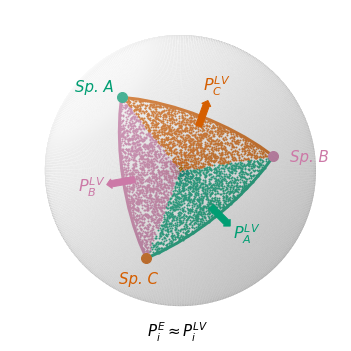

In [484]:
from matplotlib.colors import LightSource

light = LightSource(90, 45)

rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball


phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Vertices
V0 = [1, 0, 0]
V1 = [0.3406884710289558, 0.9328944522580684, 0.11678744219579273]
V2 = [0.3406884710289558, 0.12410827817548943, 0.9319487652208257]

# Incenter
In = [0.7486381, 0.4706336, 0.4669529]


# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Plot unit-ball
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 10)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 10)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 10)

# Plot simulated points
df = pandas.read_csv('../Data/simulations/random_feasible_growth_rates_3x3_symmetric.csv')

for i in range(5000):
    
    point_i = [df['r_1'][i],df['r_2'][i],df['r_3'][i]]
    point_i_rot = np.dot(rotation_matrix(axis, theta), point_i)
    point_i_rot = point_i_rot.tolist()
    
    if df['LV_first_sp_excluded'][i] == 'sp_1':
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#D55E00", marker='o', markersize = 1)
        
    elif df['LV_first_sp_excluded'][i] == 'sp_2':
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#CC79A7", marker='o', markersize = 1)
        
    else:
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#009E73", marker='o', markersize = 1)

# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)
#ax.plot(x_cap2.tolist(), y_cap2.tolist(), z_cap2.tolist(), '-.', color="k", linewidth = 2)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.text2D(0.20, 0.75, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.33, 0.18, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.837, 0.54, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.67, 0.31, r"$P_A^{LV}$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.58, 0.75, r"$P_C^{LV}$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.21,0.45, r"$P_B^{LV}$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.415,0.02, r"$P_i^E\approx P_i^{LV}$",style='italic', size=15, transform=ax.transAxes)


ax.text2D(
    0.63,0.38, "                  ", ha="center", va="center", rotation=-45, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)

ax.text2D(
    0.58, .68, "                  ", ha="center", va="center", rotation=70, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
    0.34,0.48, "                   ", ha="center", va="center", rotation=190, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CC79A7", ec="#CC79A7", lw=1),transform=ax.transAxes)

LightSource(azdeg=30)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()

fig.savefig('iso_simulation_LV_paper.PNG', format='PNG', dpi=300)
plt.show()

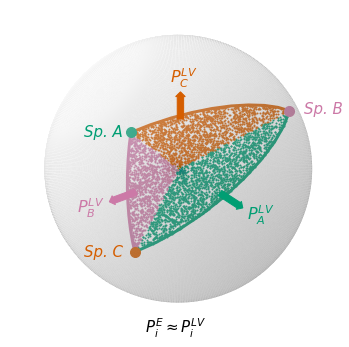

In [480]:
import pandas

rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Vertices
V0 = [1,0,0]
V1 = [-0.2000000, 0.9797959,0]
V2 = [0.624241438623307, 0.33879841108016295, 0.703944786860394]


# Incenter
In = [0.7417953, 0.5677937, 0.3568614]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Plot unit-ball
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)


# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 10)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 10)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 10)


# ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], c="k", marker='s', markersize = 10)

# Plot simulated points
df = pandas.read_csv('../Data/simulations/random_feasible_growth_rates_3x3_asymmetric.csv')

for i in range(5000):
    
    point_i = [df['r_1'][i],df['r_2'][i],df['r_3'][i]]
    point_i_rot = np.dot(rotation_matrix(axis, theta), point_i)
    point_i_rot = point_i_rot.tolist()
    
    if df['LV_first_sp_excluded'][i] == 'sp_1':
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#D55E00", marker='o', markersize = 1)
        
    elif df['LV_first_sp_excluded'][i] == 'sp_2':
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#CC79A7", marker='o', markersize = 1)
        
    else:
        
        ax.plot([point_i_rot[0]],[point_i_rot[1]],[point_i_rot[2]], c="#009E73", marker='o', markersize = 1)
        
# Plot FD limits
ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color="#009E73", linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color="#CC79A7", linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color="#D55E00", linewidth = 3, alpha = 1)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#CC79A7", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.text2D(0.23, 0.61, "Sp. A",style='italic', color="#009E73", size=15, transform=ax.transAxes)
ax.text2D(0.23, 0.25, "Sp. C",style='italic', color="#D55E00", size=15, transform=ax.transAxes)
ax.text2D(0.89, 0.68, "Sp. B",style='italic', color="#CC79A7", size=15, transform=ax.transAxes)

ax.text2D(0.72, 0.36, r"$P_A^{LV}$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.49, 0.77, r"$P_C^{LV}$",style='italic', color="#D55E00", size=16, transform=ax.transAxes)
ax.text2D(0.21,0.38, r"$P_B^{LV}$",style='italic', color="#CC79A7", size=16, transform=ax.transAxes)
ax.text2D(0.415,0.02, r"$P_i^E\approx P_i^{LV}$",style='italic', size=15, transform=ax.transAxes)


ax.text2D(
    0.67,0.42, "                  ", ha="center", va="center", rotation=-33, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#009E73", ec="#009E73", lw=1),transform=ax.transAxes)

ax.text2D(
    0.52, .7, "                  ", ha="center", va="center", rotation=90, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#D55E00", ec="#D55E00", lw=1),transform=ax.transAxes)

ax.text2D(
    0.35,0.43, "                   ", ha="center", va="center", rotation=200, size=4,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CC79A7", ec="#CC79A7", lw=1),transform=ax.transAxes)



ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()

fig.savefig('aniso_simulation_LV_paper.PNG', format='PNG', dpi=300)
plt.show()